# Clean and Analyze Employee Exit Surveys

## Introduction

In this project we will be working with exit surveys from employees of the Department of Education, Training and Employment (DETE, __[link to survey](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)__) and the Technical and Further Education (TAFE, __[link to survey](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)__) institute in Queensland, Australia. 
The dataset we will be working with has already been modified to UTF-8 encoding.
We are going to clean and analyse the data for our investors, who want to combine the results for both surveys and to know the following:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Let's start by importing the necessary libraries and explore the data.

In [39]:
import pandas as pd
import numpy as np
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

print(dete_survey.info(), '\n')
print(tafe_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [40]:
dete_survey.head(10)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994,1997,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,D,D,NaN,Female,41-45,NaN,NaN,NaN,NaN,NaN
6,7,Age Retirement,05/2012,1972,2007,Teacher,Secondary,Darling Downs South West,NaN,Permanent Part-time,...,D,D,SD,Female,56-60,NaN,NaN,NaN,NaN,NaN
7,8,Age Retirement,05/2012,1988,1990,Teacher Aide,NaN,North Coast,NaN,Permanent Part-time,...,SA,NaN,SA,Female,61 or older,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009,2009,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,A,D,N,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997,2008,Teacher Aide,NaN,Not Stated,NaN,Permanent Part-time,...,SD,SD,SD,Female,46-50,NaN,NaN,NaN,NaN,NaN


In [41]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [42]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [43]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In [44]:
print(dete_survey['Business Unit'].value_counts(dropna=False))
missing_dete = dete_survey['Business Unit'].isnull()
dete_survey[missing_dete]

NaN                                           696
Education Queensland                           54
Information and Technologies                   26
Training and Tertiary Education Queensland     12
Other                                          11
Human Resources                                 6
Corporate Strategy and Peformance               5
Early Childhood Education and Care              3
Infrastructure                                  2
Policy, Research, Legislation                   2
Indigenous Education and Training Futures       1
Finance                                         1
Pacific Pines SHS                               1
Corporate Procurement                           1
Calliope State School                           1
Name: Business Unit, dtype: int64


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
6,7,Age Retirement,05/2012,1972,2007,Teacher,Secondary,Darling Downs South West,NaN,Permanent Part-time,...,D,D,SD,Female,56-60,NaN,NaN,NaN,NaN,NaN
7,8,Age Retirement,05/2012,1988,1990,Teacher Aide,NaN,North Coast,NaN,Permanent Part-time,...,SA,NaN,SA,Female,61 or older,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009,2009,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,A,D,N,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997,2008,Teacher Aide,NaN,Not Stated,NaN,Permanent Part-time,...,SD,SD,SD,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009,2009,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,N,N,N,Male,31-35,NaN,NaN,NaN,NaN,NaN
12,13,Resignation-Other reasons,2012,1998,1998,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,SA,A,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
13,14,Age Retirement,2012,1967,2000,Teacher,Primary,Metropolitan,NaN,Permanent Part-time,...,A,D,A,Female,61 or older,NaN,NaN,NaN,NaN,NaN
14,15,Resignation-Other employer,2012,2007,2010,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,SA,N,SA,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [45]:
dete_survey['South Sea'].value_counts(dropna=False)

NaN    815
Yes      7
Name: South Sea, dtype: int64

After observation of the data above, we can conclude that there are columns containing null values in both datasets. As well as dete_survey dataframe contains 'Not Stated' values that indicate missing values, but are not represented as NaN. Moreover, tafe_survey dataset also has columns with questions on which employees had to reply yes or no. Most of the absent values in dete_survey were for the columns like Business Unit, Disability, NESB, South Sea, which primarily describe ethnical and cultural background and will not influence the main goal of our analysis

## Identify Missing Values and Drop Unnecessary Columns

In [46]:
# to represent 'Not Stated' as NaN we will read dete_survey 
#in pandas again

dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

#dropping columns from each dataframe that are not used for the analysis

dropped_dete = dete_survey.columns[28:49]
dropped_tafe = tafe_survey.columns[17:66]

dete_survey_updated = dete_survey.drop(dropped_dete, axis=1)
tafe_survey_updated = tafe_survey.drop(dropped_tafe,axis=1)

print(dete_survey_updated.info(), '\n')
print(tafe_survey_updated.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In the cell above, we set the 'Not Stated' value ti NaN by re-reading it in pandas  and setting the na_values parameter.
Moreover, we have dropped the columns from each dataframe that we won't use and in order to make it easier to work with the dataframes.

## Clean Column Names

Observing both datframes shows us that certain columns have different names despite being the same column. Taking into the consideration the fact that we will want to combine two dataframes eventually, it is necessary to standartize column names.

In [47]:
dete_survey_updated.columns = (dete_survey_updated.columns.str.lower()
                                    .str.strip().str.replace(' ','_'))
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [48]:
tafe_columns = ({'Record ID':'id','CESSATION YEAR': 'cease_date',
                 'Reason for ceasing employment': 'separationtype',
                 'Gender. What is your Gender?': 'gender',
                 'CurrentAge. Current Age': 'age',
                 'Employment Type. Employment Type': 'employment_status',
                 'Classification. Classification': 'position',
                 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
                })
tafe_survey_updated = tafe_survey_updated.rename(tafe_columns,axis=1)

tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Filter the Data

Let's consider removing more data that we won't be using in the analysis. After revising the end goal of the project (Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction?), we should take a closer look at separationtype column in each dataframe and select only repondents who resigned.

In [49]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [50]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [51]:
pattern_dete = r"(Resignation)"

resignations_d = dete_survey_updated['separationtype'].str.contains(pattern_dete)
dete_resignations = (dete_survey_updated[resignations_d]).copy()
dete_resignations

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  app.launch_new_instance()


,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
12,13,Resignation-Other reasons,2012,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
14,15,Resignation-Other employer,2012,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
16,17,Resignation-Other reasons,2012,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,False,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN
20,21,Resignation-Other employer,2012,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,NaN
21,22,Resignation-Other reasons,2012,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,False,False,False,Female,51-55,NaN,NaN,NaN,NaN,NaN


In [52]:
pattern_tafe = r"(Resignation)"

resignations_t = tafe_survey_updated['separationtype'].str.contains(pattern_tafe, na=False)
resignations_t.value_counts()
tafe_resignations = (tafe_survey_updated[resignations_t]).copy()
tafe_resignations

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  app.launch_new_instance()


,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2
10,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Female,41 45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year
13,6.341725e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Temporary Full-time,Administration (AO),11-20,Less than 1 year
14,6.341726e+17,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Permanent Part-time,Teacher (including LVT),7-10,7-10


## Verify the Data

Before we start manipulating the data, we want to make sure that our data is reasonable. In this step we will focus on the years in the cease_date (the last year of person's employment) and dete_start_date (the fisrt year of person's employment).
Taking into account that people in this field start working in their 20s, we expect the fisrt year of employment to be no earlier than 1940.
Below we are going to check if the year range is reasonable, which will mean our data overall is realistic too.

In [53]:
#checking the years for logical inconsistencies
#value_counts before extracting the year
print(dete_resignations['cease_date'].value_counts(),'\n')
year_pattern = r"(?P<Years>[1-2][0-9]{3})"
cease_date = dete_resignations['cease_date'].str.extract(year_pattern, expand=True).astype(float)
#value_counts after extracting the year
print(cease_date['Years'].value_counts().sort_index(ascending=False),'\n')
dete_resignations['cease_date'] = cease_date['Years']
print(dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False),'\n')
print(tafe_resignations['cease_date'].value_counts().sort_index(ascending=False))

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
07/2012      1
2010         1
09/2010      1
Name: cease_date, dtype: int64 

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: Years, dtype: int64 

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64 

2013.0     55
2012.0     94
2011.0    116
2010.0     68
20

Based on the data analysis using the value_counts, we observed, that start and end years are within reasonable range.

## Creating a New Column

As the main question of our project is to figure out if there are employees resigned after short or long period of work with some kind of dissatisfaction. Therefore, we will have to find out the period of work (a.k.a *service* in the Human Resources field). We know, that there is already a column which we renamed to institute_service in tafe_resignations. Hence, we should create same column for dete_resignations using the dates when employees started and ended the service.

In [54]:
dete_resignations['institute_service'] = (dete_resignations['cease_date']-dete_resignations['dete_start_date'])
dete_resignations['institute_service'].value_counts().sort_index(ascending=False)


49.0     1
42.0     1
41.0     1
39.0     3
38.0     1
36.0     2
35.0     1
34.0     1
33.0     1
32.0     3
31.0     1
30.0     2
29.0     1
28.0     2
27.0     1
26.0     2
25.0     2
24.0     4
23.0     4
22.0     6
21.0     3
20.0     7
19.0     3
18.0     5
17.0     6
16.0     5
15.0     7
14.0     6
13.0     8
12.0     6
11.0     4
10.0     6
9.0     14
8.0      8
7.0     13
6.0     17
5.0     23
4.0     16
3.0     20
2.0     14
1.0     22
0.0     20
Name: institute_service, dtype: int64

After the calculations performed in the above cell and creating a separate column in dete_resignations dataframe, using value_counts methodf we can observe that the vast majority of employees worked from 0 to 7 years. And, on the opposite, there are less employees resigned who spent more than 20 years in service.
Therefore, for now, we can conclude that employees who worked for a short period of time are resigning. However, we need to figure out if it is due to some kind of dissatisfaction or not.

## Identify Dissatisfied Employees

in order to figure out if any employees who resigned because thet were dissatisfied, we will select columns from each dataframe that we have categorized as 'dissatisfied'.

For tafe_survey_updated:
* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction

For dete_survey_updated:
* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

In [55]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [56]:
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())
tafe_resignations['Contributing Factors. Job Dissatisfaction']

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


3                        -
4                        -
5                        -
6                        -
7                        -
8                        -
9                        -
10                       -
13                       -
14     Job Dissatisfaction
15                       -
16                     NaN
17     Job Dissatisfaction
18                     NaN
19                       -
20     Job Dissatisfaction
21                       -
22                       -
23                       -
24                       -
26     Job Dissatisfaction
27                       -
29                       -
32                       -
36                       -
37                       -
39                       -
40                       -
41                       -
42                       -
              ...         
659                      -
660                      -
661    Job Dissatisfaction
665                      -
666                      -
669                      -
6

In [57]:
#updating values to True, False or NaN
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True
    
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)

print(tafe_resignations['dissatisfied'].value_counts(dropna=False))                                 

tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64


,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4,False
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2,False
10,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,Female,41 45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year,False
13,6.341725e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Female,31 35,Temporary Full-time,Administration (AO),11-20,Less than 1 year,False
14,6.341726e+17,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Female,31 35,Permanent Part-time,Teacher (including LVT),7-10,7-10,True


In [58]:
#dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department','physical_work_environment', 'lack_of_recognition', 'lack_of_job_security','work_location', 'employment_conditions', 'work_life_balance','workload']]



dete_resignations['dissatisfied'] = (dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department',
                                                    'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security',
                                                     'work_location', 'employment_conditions', 'work_life_balance',
                                                       'workload']].any(axis=1, skipna=False))

print(dete_resignations['dissatisfied'].value_counts(dropna=False))

dete_resignations_up = dete_resignations.copy()
dete_resignations_up                                                                                                              

False    162
True     149
Name: dissatisfied, dtype: int64


,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False
12,13,Resignation-Other reasons,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,14.0,False
14,15,Resignation-Other employer,2012.0,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,5.0,True
16,17,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN,NaN,True
20,21,Resignation-Other employer,2012.0,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,True,Male,56-60,NaN,NaN,NaN,NaN,NaN,30.0,False
21,22,Resignation-Other reasons,2012.0,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,False,Female,51-55,NaN,NaN,NaN,NaN,NaN,32.0,False


We have created *dissatisfied* columns in both dataframes containing True, False or NaN if a person resigned due the factors that we think are related to work dissatisfaction.

## Combine the Data

Now that we have cleaned our data, verified its quality, renamed our columns and dropped all the unnecessary data we are rteady to combine them.
We will be using pd.concat() method to combine both dataframes.

In [59]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [60]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined
# Verify the number of non null values in each column
combined.notnull().sum().sort_values()


torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

In [61]:
# Drop columns with less than 500 non null values
combined_updated = combined.dropna(thresh = 500, axis=1).copy()
combined_updated

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,36-40,2012.0,False,Permanent Full-time,Female,4.000000e+00,DETE,7,Teacher,Resignation-Other reasons
1,41-45,2012.0,True,Permanent Full-time,Female,6.000000e+00,DETE,18,Guidance Officer,Resignation-Other reasons
2,31-35,2012.0,False,Permanent Full-time,Female,9.000000e+00,DETE,3,Teacher,Resignation-Other reasons
3,46-50,2012.0,True,Permanent Part-time,Female,1.000000e+01,DETE,15,Teacher Aide,Resignation-Other employer
4,31-35,2012.0,False,Permanent Full-time,Male,1.200000e+01,DETE,3,Teacher,Resignation-Move overseas/interstate
5,36-40,2012.0,False,Permanent Full-time,Female,1.300000e+01,DETE,14,Teacher,Resignation-Other reasons
6,31-35,2012.0,True,Permanent Full-time,Male,1.500000e+01,DETE,5,Teacher,Resignation-Other employer
7,61 or older,2012.0,True,Permanent Part-time,Male,1.700000e+01,DETE,NaN,Teacher Aide,Resignation-Other reasons
8,56-60,2012.0,False,Permanent Full-time,Male,2.100000e+01,DETE,30,Teacher,Resignation-Other employer
9,51-55,2012.0,False,Permanent Part-time,Female,2.200000e+01,DETE,32,Cleaner,Resignation-Other reasons


## Clean the Service Column

At this stage of the analysis we will clean up the institute_service column. Due to the fact that it contains values in different forms, we will convert them to the following categories instead.

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company


In [62]:
# Check the unique values
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


In [63]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')
# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [64]:
def year_to_stage(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"

combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(year_to_stage)  
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

In order to make our analysis easier and more clear on the amount of time each employee worked, we have created a formula that categorizes years of service and puts the data in a unified format.

## Performing initial analysis

In [65]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [66]:
#replacing missing values with the value that occurs most frequently
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
combined_updated['dissatisfied'].value_counts()


False    411
True     240
Name: dissatisfied, dtype: int64

In [67]:
#calculating the percentage of dissatisfied employees

pivot = combined_updated.pivot_table(index = 'service_cat', values= 'dissatisfied') 


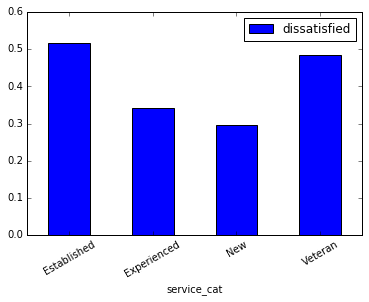

In [68]:
%matplotlib inline
pivot.plot(kind='bar', rot=30)

After data cleaning was done we are resdy to start doing some analysis.
We have replaced missing values in dissatisfied column with the value that occurs most frequently, and then created a pivot table to calculate the percentage of dissatisfied employees. Then, show the results using the plot() method.
Based on the visial representation, we can see that there is a higher percentage of dissatisfied among established and veteran category of employees.

## Handling rest of the missing values

* Decide how to handle the rest of the missing values. Then, aggregate the data according to the service_cat column again. How many people in each career stage resigned due to some kind of dissatisfaction?
* Clean the age column. How many people in each age group resgined due to some kind of dissatisfaction?
* Instead of analyzing the survey results together, analyze each survey separately. Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?

Even after the initial cleaning, we still have values remaining. Let's analyze the dataframe and try to analyze which values can be dropped without affecting the results.

In [69]:
#checking for null values
combined_updated.isnull().sum()

age                     55
cease_date              16
dissatisfied             0
employment_status       54
gender                  59
id                       0
institute                0
institute_service       88
position                53
separationtype           0
institute_service_up    88
service_cat             88
dtype: int64

We can observe that the highest missing value is 88 for institute_service, Institute_service_up and service_cat. However, they all relate to the initial institute_service column.
Another column that has 59 missing values is *gender* column. Our project question does not ask what is male/female ratio of employees that resigned due to some sort of dissatisfaction. Therefore, we can assume that this column does not influence our analysis and we can drop that column. Column *age* has 55 missing values, which is around %8.5 of the overall dataset. However, we cannot fill in the data based on our predictions or take it from a different sourse. Therefore, we will drop the null values.
At the meantime, we will explore columns *employment_status* and *position* in more details.

In [70]:
#check of the employment_status column for unique values
combined_updated['employment_status'].value_counts()

Permanent Full-time    256
Permanent Part-time    150
Temporary Full-time    120
Temporary Part-time     37
Contract/casual         29
Casual                   5
Name: employment_status, dtype: int64

In [71]:
#check of the position column for unique values
combined_updated['position'].value_counts()

Administration (AO)                                        148
Teacher                                                    129
Teacher (including LVT)                                     95
Teacher Aide                                                63
Cleaner                                                     39
Public Servant                                              30
Professional Officer (PO)                                   16
Operational (OO)                                            13
Head of Curriculum/Head of Special Education                10
School Administrative Staff                                  8
Technical Officer                                            8
Schools Officer                                              7
Workplace Training Officer                                   6
Technical Officer (TO)                                       5
School Based Professional Staff (Therapist, nurse, etc)      5
Executive (SES/SO)                                     

After the observation we can conclude that majority of employeed were on a permanent employment status and vast majority was working as a teacher or in administration. Therefore, this data will also not have a significant influence on the project's goal and we can drop this data from our dataset.

In [72]:
#dropping null values
combined_updated = combined_updated.dropna().copy()
#checking the update
print(combined_updated.isnull().sum(),'\n')

print(combined_updated.info())

age                     0
cease_date              0
dissatisfied            0
employment_status       0
gender                  0
id                      0
institute               0
institute_service       0
position                0
separationtype          0
institute_service_up    0
service_cat             0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 0 to 650
Data columns (total 12 columns):
age                     551 non-null object
cease_date              551 non-null float64
dissatisfied            551 non-null bool
employment_status       551 non-null object
gender                  551 non-null object
id                      551 non-null float64
institute               551 non-null object
institute_service       551 non-null object
position                551 non-null object
separationtype          551 non-null object
institute_service_up    551 non-null float64
service_cat             551 non-null object
dtypes: bool(1), float64(3), object(8)


As a result of dropping all the remaining missing values, we currently have 551 rows of data.
Now lets try to aggregate data base on service_cat again and explore if the result will be modified.

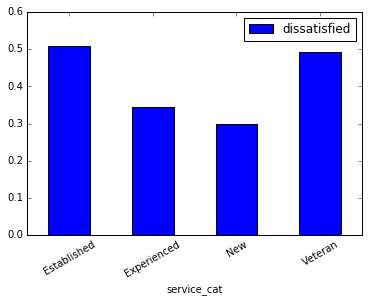

In [73]:
#creating the pivot table
pivot_2 = combined_updated.pivot_table(index = 'service_cat', values= 'dissatisfied') 
%matplotlib inline
pivot_2.plot(kind='bar', rot=30)

The result looks to be the same. We can conclude that employees who work more than 7 years are resigning due to some work dissatisfaction.

## Age Column

On this step we are going to clean the age column and figure out how many people in each age group resgined due to some kind of dissatisfaction.

In [74]:
#checking for unique values
combined_updated['age'].value_counts(dropna=False)

51-55            67
41  45           45
41-45            44
46  50           39
36-40            35
21  25           33
46-50            33
31  35           32
26  30           32
26-30            31
36  40           31
56 or older      28
31-35            28
21-25            26
56-60            21
61 or older      16
20 or younger    10
Name: age, dtype: int64

Before we start analysing the data, we need to clean it first and bring it to the unified format.


In [75]:
#cleaning the data in age column
combined_updated['age'] = (combined_updated['age'].str.strip()
                           .str.replace('21  25', '21-25')
                           .str.replace('26  30', '26-30')
                           .str.replace('31  35', '31-35')
                           .str.replace('36  40', '36-40')
                           .str.replace('41  45', '41-45')
                           .str.replace('46  50', '46-50')
                           .str.replace('61 or older', '56 or older')
                           .str.replace('56-60', '56 or older'))
#checking the update
combined_updated['age'].value_counts().sort_index(ascending=True)



20 or younger    10
21-25            59
26-30            63
31-35            60
36-40            66
41-45            89
46-50            72
51-55            67
56 or older      65
Name: age, dtype: int64

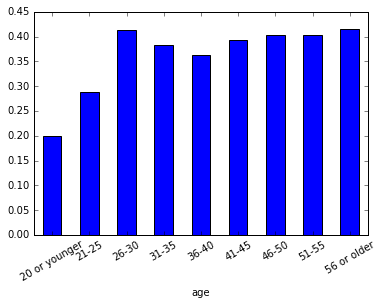

In [76]:
#creating pivot table
pivot_3 = combined_updated.pivot_table(index = 'age', values = 'dissatisfied')
#visualizing the result
pivot_3.plot(kind='bar', rot=30, legend=False)

Based on the chart above, we can conclude that employees who resigned in the age group from 26-30 are most dissatisfied with work.

## Conclusion

Base on the project analysis, we can conclude that emplyees who work more than 7 years do resign due to some kind of dissatisfaction.